<div align="center">
  <b> <font size="6">Linear Regression using Stochastic Gradient Descent</font> </b>
</div>

In [40]:
# Import necessary package
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

### Step 1: Load the dataset

In [41]:
# Load the dataset into pandas dataframe
dataset = pd.read_csv("D:\\9.BOOKS MATERIALS\\4.PROGRAMS\\Python_Programs\\Datasets\\Advertising.csv") 
# Change this location based on the location of dataset in your machine

In [42]:
# Display the first five records
dataset.head() 

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


Advertising data comprises four features: TV, radio, newspaper, and sales. It explains the budget (in 1000$) spent on different mass media and the net outcome for every week. 
<ul>
  <li>sales for a product (<b> output/dependent/target feature </b>).</li>
  <li>advertising budget for TV, radio, and newspaper media (<b> input/independent feature </b>).</li> 
</ul> 
Planning to perform regression on TV budget (X) as input feature and sales (Y) as output feature.

<b>Row </b> <=> record, tuple, instance, sample, observation, object, case, entity <br>
<b>Column </b> <=> attribute, variable, field, feature, characteristic, dimension

In [43]:
# Dataset shape (number of rows and columns)
dataset.shape

(200, 4)

### Step 2. EDA

##### Bivariate analysis

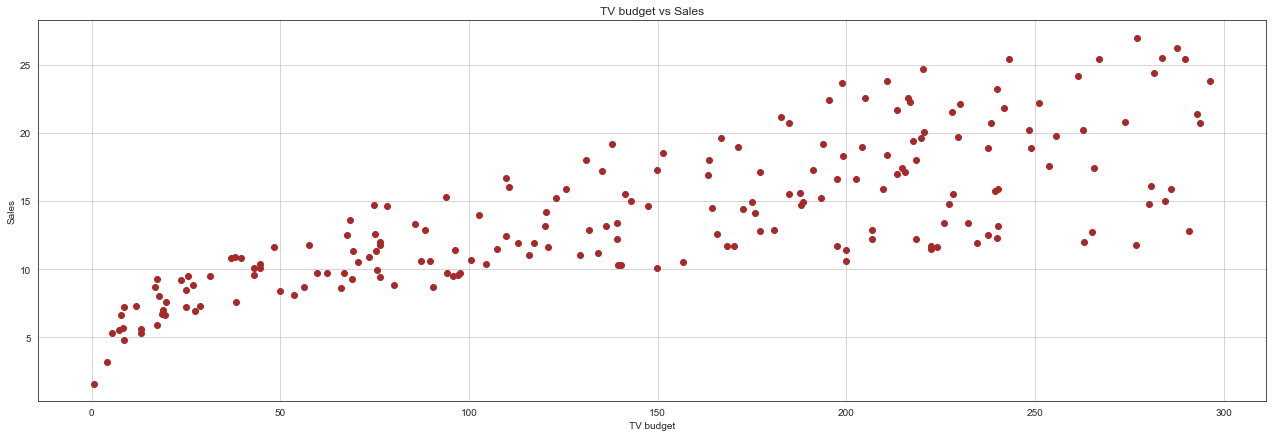

In [44]:
# Scatter plot
sns.set_style(style='white') 
fig = plt.figure(figsize=(22,7)) 
plt.scatter(dataset.TV,dataset.sales,color="brown")
plt.grid(b=None)
plt.xlabel("TV budget")
plt.ylabel("Sales")
plt.title("TV budget vs Sales")
plt.show()

### Step 3. Pre-process and extract the features

In [45]:
# Normalize the data (converting features of different scale into values between 0 and 1)
from sklearn import preprocessing
x = dataset.values                                    # returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df = pd.DataFrame(x_scaled)
df.head()

,0,1,2,3
0,0.775786,0.762097,0.605981,0.807087
1,0.148123,0.792339,0.394019,0.346457
2,0.055800,0.925403,0.606860,0.303150
3,0.509976,0.832661,0.511873,0.665354
4,0.609063,0.217742,0.510994,0.444882


### Step 4. Split the data for training and testing

In [46]:
# Splitting dataset into training and testing set
from sklearn.model_selection import train_test_split
# x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)
# The above returns data as numpy array

# The following returns records in random as pandas.core.frame.DataFrame
train, test = train_test_split(df, test_size=0.2)

### Step 5: Training phase (bulding the model) using Gradient Descent

Linear model => y = m x + b. Let us apply gradient descent to obtain the optimal values of m and b

##### Parameter initialization

In [47]:
# np.random.seed(13)
# number of iterations (epochs)
epoch = 1000
# learning rate
learn_rate = 0.001
# batch_size  
batch_size = 5  # Try changing the value from 1 to 159

<b> Note: </b> Batch size should be between 1 to number of records (n) in x_train. If batch size is 
<ul>
  <li>1 - It is stochastic gradient descent. We randomly pick 1 training sample every iteration, perform forward pass, compute the error and immidiately adjust the parameters.</li>
  <li>2 to n/2 - It is called mini batch stochastic gradient descent. We randomly pick a batch training samples every iteration, perform forward pass, compute the error and immidiately adjust the parameters. </li>
  <li>n - It is called batch gradient descent (simple gradient decent). We use all the training samples in forward pass to calculate cumulitive error and than we adjust the parameter values</li>
</ul>

##### Objective, Derivative, and Cost function

In [48]:
# Prediction function  
def predict(m, b, x_train):
    return m * x_train + b

In [49]:
# Partial derivative of SSE(m,b) with respect to m
def deriv_m(x_train, y_train, y_predicted):
    return -2 * (x_train * (y_train - y_predicted)).sum()

# Partial derivative of SSE(m,b) with respect to m
def deriv_b(y_train, y_predicted):
    return  -2 * (y_train - y_predicted).sum()

In [50]:
# SSE (cost/loss/error) calculation
def cost_fun(y_train,y_predicted):
    error = (y_train - y_predicted)**2  
    SSE = error.sum()
    return SSE

##### Gradient descent algorithm for 2 parameters

In [51]:
# Gradient descent algorithm
def gradient_descent():
    # track all solutions
    solutions_m, solutions_b, cost = list(), list(), list()
    
    # generate an initial point for parameters m and b
    curr_soln_m = 0
    curr_soln_b = 1  
    
    # run the gradient descent
    for i in range(epoch): 
        
        # Forming the batch
        sampled_data = train.sample(batch_size)
        x_train = sampled_data[0].values      # TV
        y_train = sampled_data[3].values      # sale
        
        # prediction
        y_predicted = predict(curr_soln_m, curr_soln_b, x_train)
        # you are passing numpy arrays to perform vector operations
        
        # gradient calculation
        gradient_m = deriv_m(x_train, y_train, y_predicted)
        gradient_b = deriv_b(y_train, y_predicted)
        
        # step size calculation
        step_size_m = learn_rate * gradient_m
        step_size_b = learn_rate * gradient_b  
        
        # solution update
        curr_soln_m = curr_soln_m - step_size_m 
        curr_soln_b = curr_soln_b - step_size_b 
        
        # SSE (error/cost/loss) calculation
        SSE = cost_fun(y_train, y_predicted)  
       
        # store the solution
        solutions_m.append(curr_soln_m)
        solutions_b.append(curr_soln_b) 
        cost.append(SSE)
        
        # report progress
        # print('>epoch %d => m %.5f b %.5f cost %.3f ' % (i, curr_soln_m, curr_soln_b,SSE)) 
        
    return [solutions_m, solutions_b, cost, y_predicted]

In [52]:
# perform the gradient descent search
solutions_m, solutions_b, cost, y_train_pred = gradient_descent()

You can observe the fluctuation in the cost (not converging). It is due to selecting records in random.

In [53]:
m = solutions_m[epoch-1]
b = solutions_b[epoch-1]
print("y = m x + b ==>  y = ",round(m,2)," x + ",round(b,2))

y = m x + b ==>  y =  0.14  x +  0.42


##### Visualizing the model

We need all training X and Y, because x_train contains only sample from training set

In [54]:
X_train = train[0].values      # TV
Y_train = train[3].values      # sale
Y_train_predicted = predict(m, b, X_train)

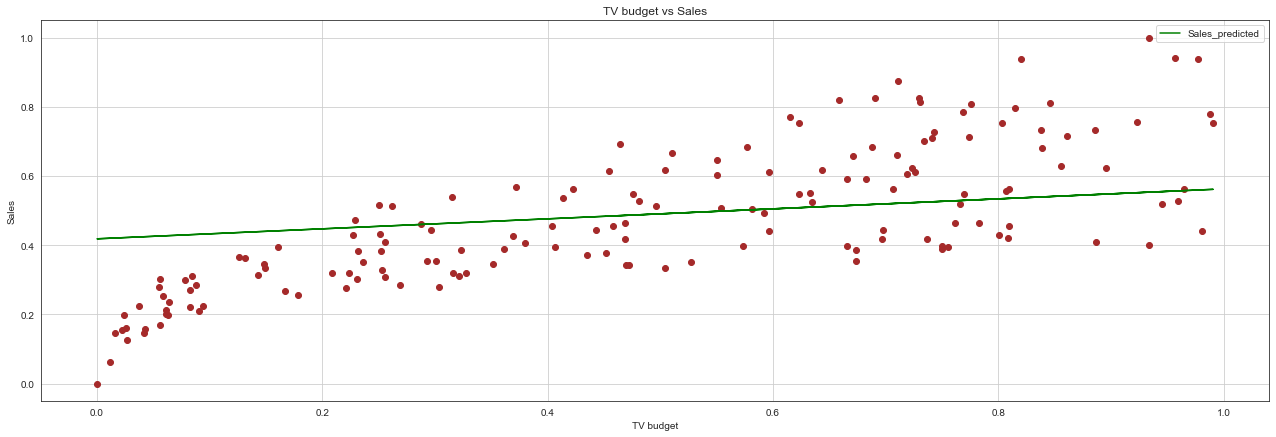

In [55]:
sns.set_style(style = 'white') 
fig = plt.figure(figsize = (22, 7)) 
plt.scatter(X_train, Y_train, color = "brown") 
plt.grid(b = None) 
plt.plot(X_train, Y_train_predicted, "g", label = "Sales_predicted")
plt.xlabel("TV budget")
plt.ylabel("Sales")
plt.title("TV budget vs Sales")
plt.legend()
plt.show()

##### Plotting observed sale (x) and predicted sale (y) for training set

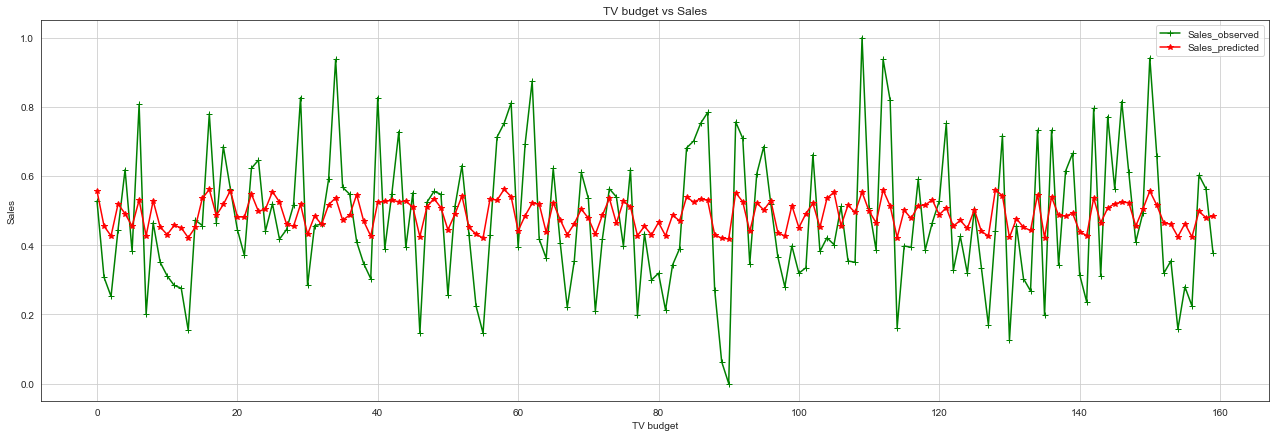

In [56]:
x = np.arange(len(Y_train_predicted)) 
fig = plt.figure(figsize = (22, 7)) 
plt.plot(x, Y_train, "g-+", label = "Sales_observed")
plt.plot(x, Y_train_predicted, "r-*", label = "Sales_predicted")
plt.grid(b = None) 
plt.xlabel("TV budget")
plt.ylabel("Sales")
plt.title("TV budget vs Sales")
plt.legend()
plt.show() 

#### Residual (Error) plot 

If the model has done good predictions, then the datapoints must be near around to horizontal line.

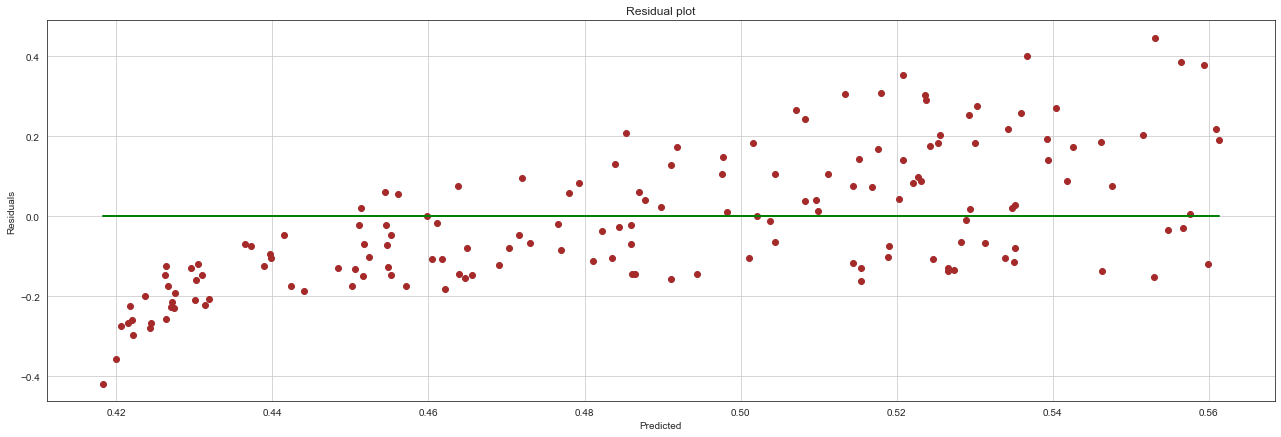

In [57]:
sns.set_style(style='white') 
fig = plt.figure(figsize = (22, 7)) 
residuals = Y_train - Y_train_predicted
zeros = Y_train - Y_train
plt.scatter(Y_train_predicted, residuals, color = "brown")
plt.grid(b = None) 
plt.plot(Y_train_predicted, zeros, "g")
plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.title("Residual plot") 
plt.show()

##### Plotting SSE minimization

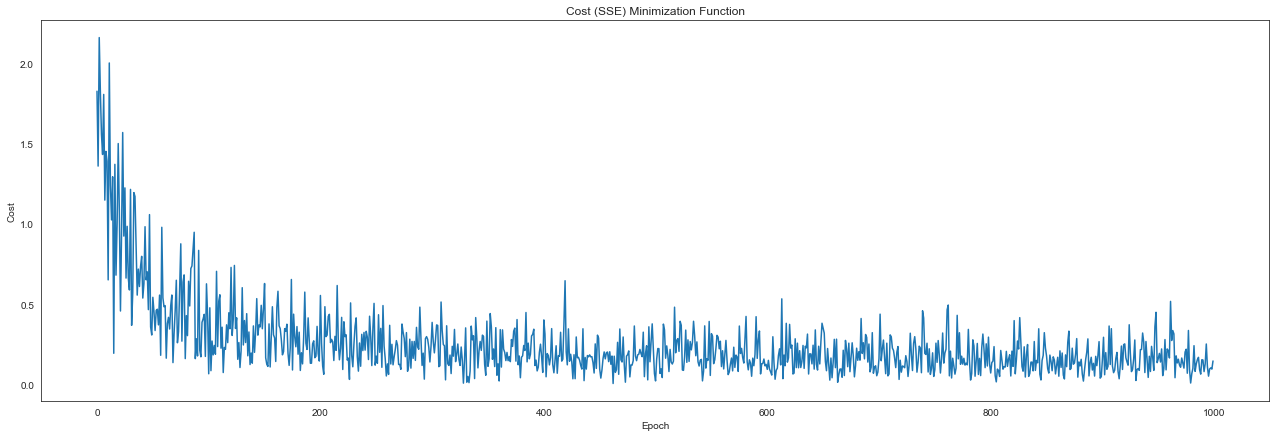

In [58]:
x = np.arange(epoch) 
fig = plt.figure(figsize = (22, 7)) 
plt.plot(x,cost)  
plt.xlabel("Epoch")
plt.ylabel("Cost")  
plt.title("Cost (SSE) Minimization Function")
plt.show() 

##### Plotting slope (m) and intercept (b) convergence

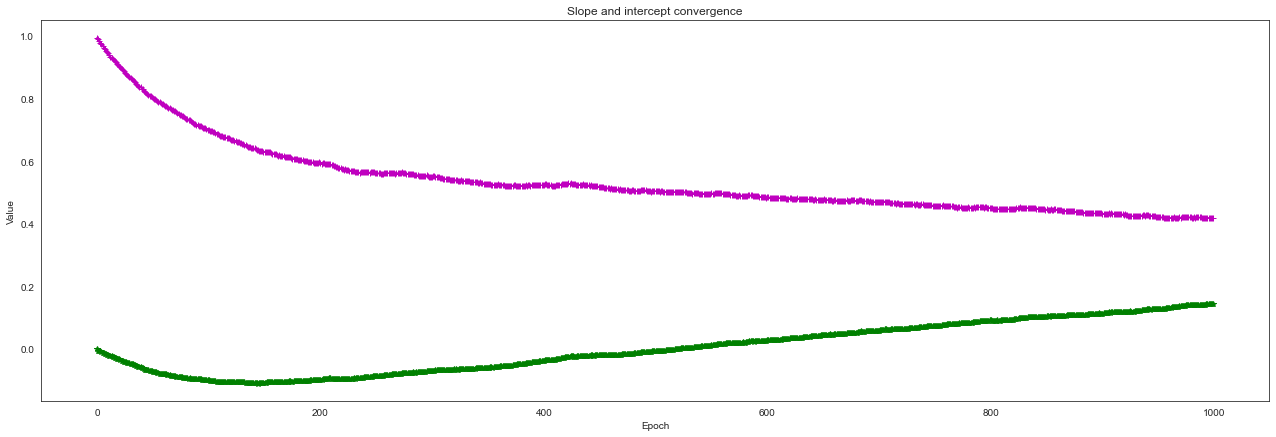

In [59]:
x = np.arange(epoch) 
fig = plt.figure(figsize = (22,7)) 
plt.plot(x, solutions_m, "g*") 
plt.plot(x, solutions_b, "m+-") 
plt.xlabel("Epoch")
plt.ylabel("Value")  
plt.title("Slope and intercept convergence")
plt.show() 

### Different error calculations to asses the model for training set

##### 1. Sum of Squared Error (SSE)

\begin{equation}
SSE(m,b) = \sum_{i=1}^{n}(y_{i}-\hat y)^{2} = \sum_{i=1}^{n}(y_{i}-(m*x_{i}+b))^{2}
\end{equation}

In [60]:
sum = 0   
n = len(X_train)  
for i in range (0,n):   
  diff = Y_train[i] - Y_train_predicted[i]   
  squ_diff = diff**2   
  sum = sum + squ_diff   
Train_SSE = np.round(sum,2)
print("Sum of Squared Error (SSE) :",Train_SSE)

Sum of Squared Error (SSE) : 4.55


##### 2. Mean Squared Error (MSE)

\begin{equation}
MSE(m,b) = \frac{\sum_{i=1}^{n}(y_{i}-\hat y)^{2}}{n} = \frac{\sum_{i=1}^{n}(y_{i}-(m*x_{i}+b))^{2}}{n}
\end{equation}

In [61]:
Train_MSE = np.round(Train_SSE/n,2)
print("Mean Squared Error (MSE) :",Train_MSE)

Mean Squared Error (MSE) : 0.03


##### 3. Root Mean Squared Error (RMSE)

\begin{equation}
RMSE(m,b) = \sqrt{\frac{\sum_{i=1}^{n}(y_{i}-\hat y)^{2}}{n}} = \sqrt{\frac{\sum_{i=1}^{n}(y_{i}-(m*x_{i}+b))^{2}}{n}}
\end{equation}

In [62]:
Train_RMSE = np.round(np.sqrt(Train_MSE),2)
print("Root Mean Squared Error (RMSE) :",Train_RMSE)

Root Mean Squared Error (RMSE) : 0.17


##### 4. Mean Absolute Error (MAE)

\begin{equation}
MAE(m,b) = \frac{\sum_{i=1}^{n}\left\lvert(y_{i}-\hat y)\right\lvert}{n} 
\end{equation}

In [63]:
sum = 0   
n = len(X_train)  
for i in range (0,n):   
  diff = Y_train[i] - Y_train_predicted[i]   
  sum = sum + np.abs(diff)   
Train_MAE = np.round(sum/n,2)
print("Mean Absolute Error (MAE) :",Train_MAE)

Mean Absolute Error (MAE) : 0.14


##### 5. Mean Absolute Percentage Error (MAPE)

\begin{equation}
MAPE(m,b) = \frac{100\%}{n}\sum_{i=1}^{n}\left\lvert\frac{(y_{i}-\hat y)}{y_{i}}\right\lvert  = \frac{100\%}{n}\sum_{i=1}^{n}\left\lvert\frac{(y_{i}-(m*x_{i}+b))}{y_{i}}\right\lvert 
\end{equation}

In [64]:
sum = 0   
n = len(X_train)  
for i in range (0,n):  
    if Y_train[i] == 0:
        continue
    else:
        diff = (Y_train[i] - Y_train_predicted[i])/Y_train[i]
        sum = sum + np.abs(diff)  
Train_MAPE = np.round(sum/n*100,2)
print("Mean Absolute Percentage Error (MAPE) :",Train_MAPE) 

Mean Absolute Percentage Error (MAPE) : 39.94


### Calculating R-Squred value (goodness of model) using SSE

\begin{equation}
R^{2} = 1- \frac{SSE}{SST} = 1- \frac{\sum_{i=1}^{n}(y_{i}-\hat y)^{2}}{\sum_{i=1}^{n}(y_{i}-\bar y)^{2}} 
\end{equation}

In [65]:
from sklearn.metrics import r2_score
out = r2_score(Y_train, Y_train_predicted)
Train_RS = np.round(out,2)*100
print("R-Squred value (goodness of model) for training set :",Train_RS,"%") 

R-Squred value (goodness of model) for training set : 28.000000000000004 %


### Step 6: Testing phase

In [66]:
# Predicting values for test input set
X_test = test[0].values      # TV
Y_test = test[3].values      # sale
Y_test_predicted = predict(m, b, X_test) 

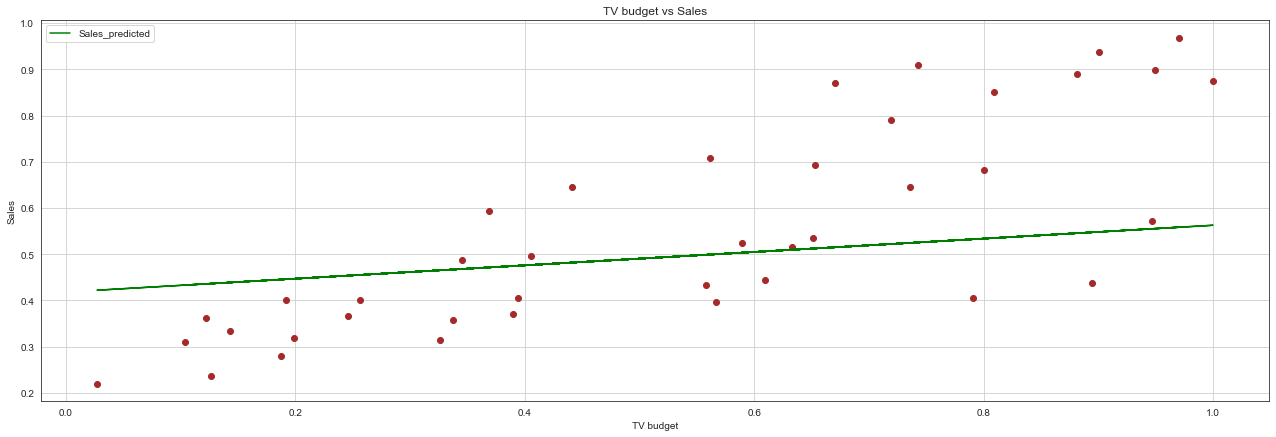

In [67]:
sns.set_style(style = 'white') 
fig = plt.figure(figsize = (22, 7)) 
plt.scatter(X_test, Y_test, color = "brown")
plt.grid(b = None) 
plt.plot(X_test, Y_test_predicted, "g", label = "Sales_predicted")
plt.xlabel("TV budget")
plt.ylabel("Sales")
plt.title("TV budget vs Sales")
plt.legend()
plt.show()

##### Plotting observed sale (x) and predicted sale (y) for test set

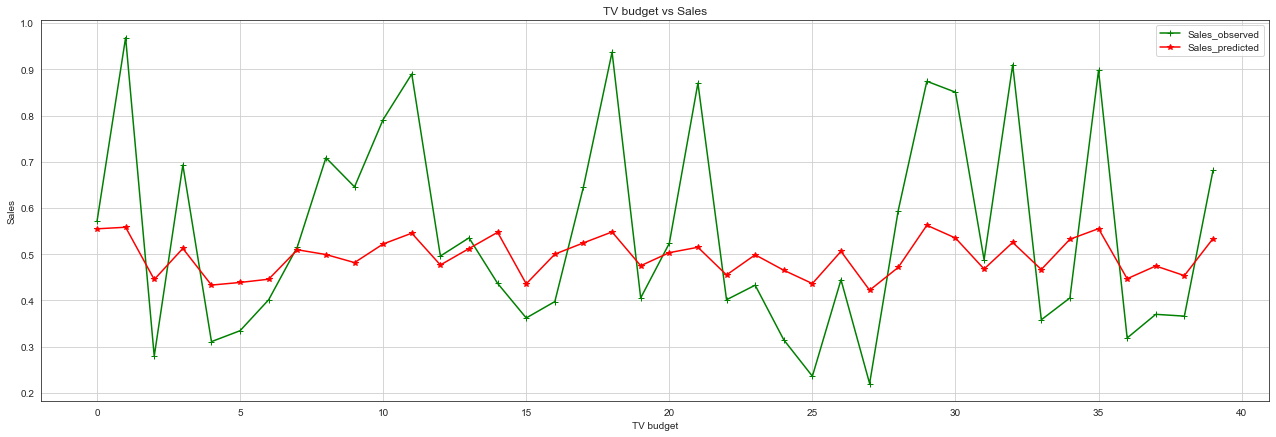

In [68]:
x = np.arange(len(Y_test_predicted)) 
fig = plt.figure(figsize = (22, 7)) 
plt.plot(x, Y_test, "g-+", label = "Sales_observed")
plt.plot(x, Y_test_predicted, "r-*", label = "Sales_predicted")
plt.grid(b = None) 
plt.xlabel("TV budget")
plt.ylabel("Sales")
plt.title("TV budget vs Sales")
plt.legend()
plt.show() 

#### Residual (Error) plot 

If the model has done good predictions, then the datapoints must be near around to horizontal line.

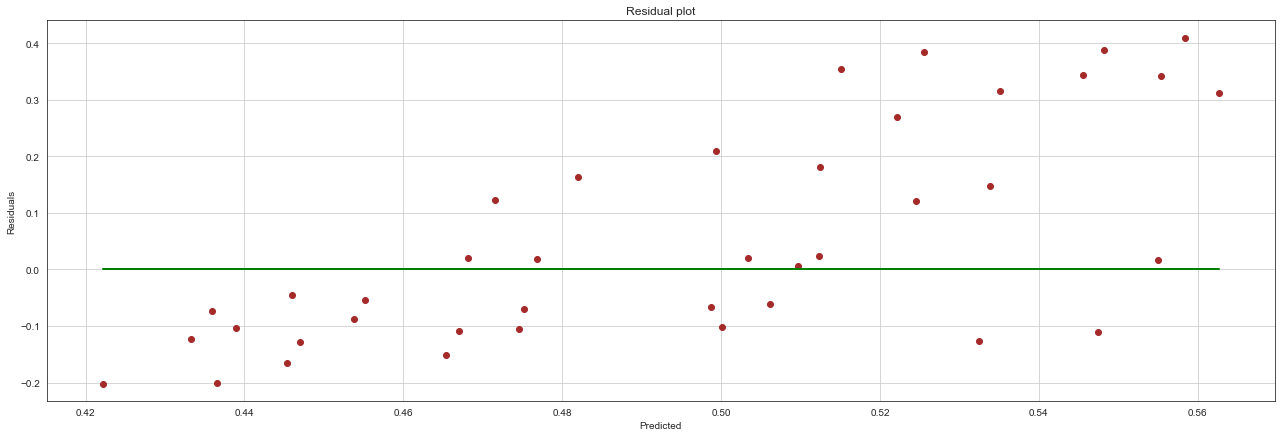

In [69]:
sns.set_style(style = 'white') 
fig = plt.figure(figsize = (22,7)) 
residuals = Y_test - Y_test_predicted
zeros = Y_test - Y_test
plt.scatter(Y_test_predicted, residuals, color = "brown")
plt.grid(b = None) 
plt.plot(Y_test_predicted, zeros, "g")
plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.title("Residual plot")
plt.show()

#### Storing the outcome in a file

In [70]:
# Store the predicted value for sales in new column
dataset.rename(columns={'sales': 'observed_sales'}, inplace=True)
sales_data = dataset.iloc[:,0].values.reshape(-1, 1)
predicted_values = predict(m, b, sales_data)
dataset['predicted_sales'] = predicted_values
dataset.head()

,TV,radio,newspaper,observed_sales,predicted_sales
0,230.1,37.8,69.2,22.1,33.641536
1,44.5,39.3,45.1,10.4,6.843457
2,17.2,45.9,69.3,9.3,2.901713
3,151.5,41.3,58.5,18.5,22.292781
4,180.8,10.8,58.4,12.9,26.523296


In [71]:
# Write the above output input into new csv
# dataset.to_csv("Gradient Descenet for Linear Regression output.csv") 

### Different error calculations to asses the model for the test set

##### 1. Sum of Squared Error (SSE)

\begin{equation}
SSE(m,b) = \sum_{i=1}^{n}(y_{i}-\hat y)^{2} = \sum_{i=1}^{n}(y_{i}-(m*x_{i}+b))^{2}
\end{equation}

In [72]:
sum = 0   
n = len(X_test)  
for i in range (0,n):   
  diff = Y_test[i] - Y_test_predicted[i]   
  squ_diff = diff**2   
  sum = sum + squ_diff   
Test_SSE = np.round(sum,2)
print("Sum of Squared Error (SSE) :",Test_SSE)

Sum of Squared Error (SSE) : 1.52


##### 2. Mean Squared Error (MSE)

\begin{equation}
MSE(m,b) = \frac{\sum_{i=1}^{n}(y_{i}-\hat y)^{2}}{n} = \frac{\sum_{i=1}^{n}(y_{i}-(m*x_{i}+b))^{2}}{n}
\end{equation}

In [73]:
Test_MSE = np.round(Train_SSE/n,4)
print("Mean Squared Error (MSE) :",Test_MSE)

Mean Squared Error (MSE) : 0.1138


##### 3. Root Mean Squared Error (RMSE)

\begin{equation}
RMSE(m,b) = \sqrt{\frac{\sum_{i=1}^{n}(y_{i}-\hat y)^{2}}{n}} = \sqrt{\frac{\sum_{i=1}^{n}(y_{i}-(m*x_{i}+b))^{2}}{n}}
\end{equation}

In [74]:
Test_RMSE = np.round(np.sqrt(Test_MSE),2)
print("Root Mean Squared Error (RMSE) :",Test_RMSE)

Root Mean Squared Error (RMSE) : 0.34


##### 4. Mean Absolute Error (MAE)

\begin{equation}
MAE(m,b) = \frac{\sum_{i=1}^{n}\left\lvert(y_{i}-\hat y)\right\lvert}{n} 
\end{equation}

In [75]:
sum = 0   
n = len(X_test)  
for i in range (0,n):   
  diff = Y_test[i] - Y_test_predicted[i]   
  sum = sum + np.abs(diff)   
Test_MAE = np.round(sum/n,2)
print("Mean Absolute Error (MAE) :",Test_MAE)

Mean Absolute Error (MAE) : 0.16


##### 5. Mean Absolute Percentage Error (MAPE)

\begin{equation}
MAPE(m,b) = \frac{100\%}{n}\sum_{i=1}^{n}\left\lvert\frac{(y_{i}-\hat y)}{y_{i}}\right\lvert  = \frac{100\%}{n}\sum_{i=1}^{n}\left\lvert\frac{(y_{i}-(m*x_{i}+b))}{y_{i}}\right\lvert 
\end{equation}

In [76]:
sum = 0   
n = len(X_test)  
for i in range (0,n): 
    if Y_test[i] == 0:
        continue
    else: 
        diff = (Y_test[i] - Y_test_predicted[i])/Y_test[i]
        sum = sum + np.abs(diff)   
Test_MAPE = np.round(sum/n*100,2)
print("Mean Absolute Percentage Error (MAPE) :",Test_MAPE) 

Mean Absolute Percentage Error (MAPE) : 29.06


### Calculating R-Squred value (goodness of model) using SSE

\begin{equation}
R^{2} = 1- \frac{SSE}{SST} = 1- \frac{\sum_{i=1}^{n}(y_{i}-\hat y)^{2}}{\sum_{i=1}^{n}(y_{i}-\bar y)^{2}} 
\end{equation}

In [77]:
from sklearn.metrics import r2_score
out = r2_score(Y_test, Y_test_predicted)
Test_RS = np.round(out, 2) * 100
print("R-Squred value (goodness of model) for testing set :",Test_RS,"%")  

R-Squred value (goodness of model) for testing set : 21.0 %


### Underfitting and overfitting observation

In [78]:
print("Error \t From training phase       From testing phase ")
print("===================================================")
print("SSE   \t\t",Train_SSE,"\t\t\t", Test_SSE)
print("MSE   \t\t",Train_MSE,"\t\t\t", Test_MSE)
print("RMSE   \t\t",Train_RMSE,"\t\t\t", Test_RMSE)
print("MAE   \t\t",Train_MAE,"\t\t\t", Test_MAE)
print("RS   \t\t",Train_RS,"\t\t\t", Test_RS)

Error 	 From training phase       From testing phase 
SSE   		 4.55 			 1.52
MSE   		 0.03 			 0.1138
RMSE   		 0.17 			 0.34
MAE   		 0.14 			 0.16
RS   		 28.000000000000004 			 21.0
